<center><h2>Quantum Pinball</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
<p>
    Schrödinger equation solved for 2-D wave packet colliding with 3 impenetrable disks forming equilateral triangle.

<IPython.core.display.Javascript object>


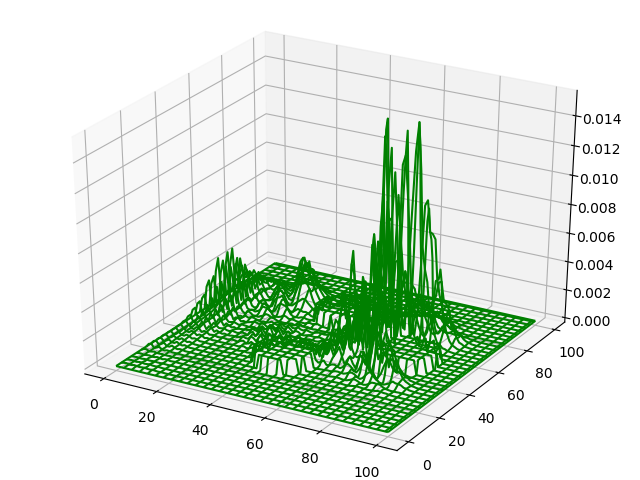

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
finito


In [1]:
# QuantumPinball.py: 2-D wave packet colliding with 3 disks

% matplotlib notebook
import matplotlib.pylab as p
import  numpy as np
from mpl_toolkits.mplot3d import Axes3D

x1 = 51              
r = 10                           # radius of disks
xmax = 100                    
nmax = 101                    
V = np.zeros((nmax,nmax),float)  # potential
dx  =  0.1                       # increment dx = dz
dx2  =  dx*dx                
k0  = 20.                    # x wave vector  
k1 = 0.                      # z wave vector
dt  =  0.002                  
fc = dt/dx2                  # factor
Re = np.zeros((nmax,nmax),float)     # Re psi
I = np.zeros((nmax,nmax),float)      # IM psi
psi = np.zeros((nmax,nmax),float)

def pot(xa,ya):            #xa,za: center of disk
     for i in range (ya-r,ya+r+1):   # r = disk radius, 
        for j in range(xa-r,xa+r+1): # ends of x axis of disk
            if np.sqrt((i-ya)**2+(j-xa)**2)< = r:  V[i,j] = 5. # infinite V

def potential():
    pot(30,45)  # center of each ring
    pot(70,45)
    pot(50,80)   
    
potential()        

def initial(xin,yin):        # initial position of wave packet (xin,zin)     
    for i in np.arange(0,nmax):
        for j in np.arange(0, nmax):
             Re[i,j] = np.exp(-0.03*(i-yin)**2- 0.03*(j-xin)**2)*np.cos(k0*i+k1*j)
             I[i,j] = np.exp(-0.03*(i-yin)**2-0.03*(j-xin)**2)*np.sin(k0*i+k1*j)
            
def plotinitial():
    for i in range(1,nmax-1):       
        for j in range(1,nmax-1): 
            if V[i,j]! = 0:    # wave function is zero when potential is ! = 0
                Re[i,j] = 0
                I[i,j] = 0
            psi[i,j]  =  (Re[i,j ]**2 +I[i, j ]**2)+0.01*V[i,j]  
      
def funcz(psi):
    z  =  psi[X,Y]                        
    return z

xin = 40         # initial wave packet position  0 <= x, y <= 100
yin =  25          
initial(xin,yin)            
plotinitial()
ix  =  np.arange(0, 101)
iy  =  np.arange(0,101)
X, Y  =  np.meshgrid(ix, iy)
Z = funcz(psi)
fig  =  p.figure()               # Create figure
ax  =  Axes3D(fig)  
ix  =  np.arange(0, nmax)
iy  =  np.arange(0,nmax)

for t in range(0,150):    # plots wf at time 120
    if t%10 == 0:
        print(t)      
    I[1:-1,1:-1] =  I[1:-1,1:-1]+fc*(Re[2: ,1:-1]+Re[:-2 ,1:-1]-4*Re[1:-1,1:-1] + \
                       Re[1:-1,2: ]+Re[1:-1, :-2])+ V[1:-1,1:-1]*dt*Re[1:-1,1:-1]
    Re[1:-1, 1:-1] = Re[1:-1,1:-1]-fc*(I[2: ,1:-1]+I[ :-2,1:-1]-4*I[1:-1,1:-1] \
                       +I[1:-1,2: ]+I[1:-1, :-2])+ V[1:-1,1:-1]*dt*I[1:-1,1:-1]   
    for i in range(1, nmax-1):
        for j in range(1,nmax-1):# wavefunction 0 when potential is diff of 0
             if V[i,j] ! = 0:      # wave function 0 causes reflections
                 Re[i,j] = 0
                 I[i,j] = 0
             yy  = 0.1* (Re[i,j ]**2 +I[i, j]**2)+0.0002*V[i,j] # plotws wf & disks
             psi[i,j] = yy
                
X, Y  =  np.meshgrid(ix, iy)
Z = funcz(psi)   
ax.plot_wireframe(X, Y, Z, color  =  'g')     # grenn wireframe
print("finito")    
p.show()        